# BAIT 509 Assignment 1

__Evaluates__: Lectures 1 - 4. 

__Rubrics__: Your solutions will be assessed primarily on the accuracy of your coding, as well as the clarity and correctness of your written responses. The MDS rubrics provide a good guide as to what is expected of you in your responses to the assignment questions. In particular, here are the most relevant ones:

- [accuracy rubric](https://github.com/UBC-MDS/public/blob/master/rubric/rubric_accuracy.md), for evaluating your code.
- [reasoning rubric](https://github.com/UBC-MDS/public/blob/master/rubric/rubric_reasoning.md), for evaluating your written responses.

__Attribution__: This assignment was created by Tomas Beuzen and Vincenzo Coia.

## Tidy Submission (5%)

- Complete this assignment by filling out this jupyter notebook.
- You must use proper English, spelling, and grammar.
- You will submit two things to Canvas:
    1. This jupyter notebook file containing your responses; and,
    2. A html file of your completed notebook (use `jupyter nbconvert --to html_embed assignment.ipynb` in the terminal to generate the html file).
- Submit your assignment through [UBC Canvas](https://canvas.ubc.ca/courses/35074) by **11:59pm Monday 20th January**.

## Exercise 1: $k$-NN Fundamentals (worth a total of 35%)


Here we will attempt classification of the famous handwritten digits data set. This data set exists in many forms; but we will use the one bundled in `sklearn.datasets` in Python. You can read more about the data [here](https://scikit-learn.org/stable/datasets/index.html#digits-dataset).

Use the following cell to load and extract the data into features (`X`) and target (`y`):

In [1]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits['data']    # this is the data with each 8x8 image "flattened" into a length-64 vector.
y = digits['target']  # these are the labels (0-9).

Here's a plot of a random example:

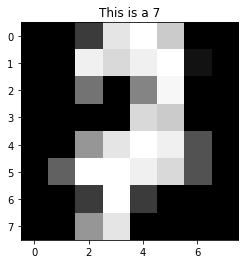

In [2]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0, digits['images'].shape[0]-1) 
plt.imshow(digits['images'][idx], cmap='Greys_r')
plt.title(f"This is a {digits['target'][idx]}");

### 1(a) Fundamentals (15%)


1. How many features are there, and what are they?
2. Which is closer to the digit 0 (`X[0]`): the digit 1 (`X[1]`) or the digit 2 (`X[2]`)? Report the two Euclidean distances (hint: you might find the [sklearn function euclidean_distances](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html) useful here).
3. Using the above information, if only elements 1 and 2 are used in a $k$-NN classifier with $k=1$, what would element 0 be classified as, and why?

### 1(b) Investigating error (10%)

You'll be using a [*k*-NN classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for this question.

Using `k=20`, fit a $k$-NN classifier with `X` and `Y` using all of the data as your training data. Then, obtain the predictions of `X`. 

1. What proportion of these predictions are **incorrect**? This is called the _error rate_.    
2. Choose one case that was not predicted correctly. What was predicted, and what is the correct label? Plot the image, and comment on why you think the classifier made a mistake. 



### 1(c) One Nearest Neighbour error (10%)

Now fit the classifier using `k=1`, using all of your data as training data, and again obtain predictions from `X`. 

1. What proportion of these predictions are incorrect? Briefly explain why this error rate is achieved (in one or two sentences; think about how the $k$-NN algorithm works).    
2. With the above error rate in mind, if I give you a new handwritten digit (not in the data set), will the classifier _for sure_ predict the label correctly? Briefly explain why or why not.

## Exercise 2: Investigating $k$-NN Error (worth a total of 20%)

In lectures, we explored how the value of $k$ could influence the train/test error. In this question, we will explore how the partition of train/test data can influence error.

Choose any value of $k$ between 1 and 10. For different partitions of the full data set into training and testing sets (e.g., 10%/90%, 20%/80%, 30%/70%, etc.), obtain training and test error rates. Plot training and test error (on the same axes) vs. the proportion of training examples. Briefly comment on the insights that this plot yields.


## Exercise 3: Decision Trees (worth a total of 40%)

We'll be using the famous Titanic dataset to try and predict survival of passengers (`Survival`) from `Age`, `Fare`, and `Sex`, using a decision tree classifier. You can find the data in the assignment folder on Canvas. Details of the data can be found at https://www.kaggle.com/c/titanic/data. You will need to select only the columns above from the full dataset provided.

### 3(a) Feature pre-processing (15%)

1. Load the data into a pandas dataframe using the `pd.read_csv()` function. How many observations are there in the data? Remove all rows from the dataframe that contain a `NaN` value using the function `df.dropna()`. How many observations are there now?
2. Use one-hot-encoding to encode the `Sex` column to numeric values (don't forget to drop the first column using the argument `drop="first"` and to specify `sparse=False`). Ouput the head of the transformed dataframe.
3. Is it necessary to scale the numeric features for use in your decision tree classifier? In 1-2 sentences, briefly explain your answer.
4. Split the data into 80% training, 20% testing data.

### 3(b) Hyperparameter optimization (10%)

1. Using 10-fold cross validation and the training set only, find an appropriate value for the `max_depth` hyperparameter for a decision tree classifier. Make a plot of training error and cross-validation error for different values of `max_depth`.
2. In 1-2 sentences, briefly discuss what sections of your plot likely represent a model that is well fit to the data and which sections represent a model that is overfit.

### 3(c) Final model (15%)

Based on your results from 3(b) select a value for the hyperparameter `max_depth`. In 1-2 sentences briefly explain why you chose this particular value. Train a decision tree classifier using the training set and your chosen `max_depth` hyperparameter and then obtain the test error on the test set.